In [1]:
import igl
import meshplot as mp
import numpy as np
import matplotlib
import scipy.io
import h5py
import time
from IPython.core.display import display, HTML
import argparse
import os
import mat73

/tmp/ipykernel_3331082/2853137656.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
mat=mat73.loadmat('/project/GIMRI_model/results/figures/for_YS/fig1_sub1.mat')
print(mat)
if mat['vertices'].shape:
    print('yes')
v=mat['vertices']
print(np.max(v[:,0]),np.max(v[:,1]),np.max(v[:,2]))
print(np.min(v[:,0]),np.min(v[:,1]),np.min(v[:,2]))

AssertionError: /project/GIMRI_model/results/figures/for_YS/fig1_sub1.mat does not exist

In [8]:
def Visual_3D(v,f,c=np.array([241, 153, 159])/255,n="figure0",add_landmark=None,v_box_coods=None):
    #255, 166, 203
    p=mp.plot(v,f,c,plot=False)
    if add_landmark is not None:
        p.add_points(add_landmark,shading={"point_size": 5,"point_color": 'blue'})
    if v_box_coods:
        m=v_box_coods['m']
        ma=v_box_coods['ma']
        v_box = np.array([[m[0], m[1], m[2]], [ma[0], m[1], m[2]], [ma[0], ma[1], m[2]], [m[0], ma[1], m[2]],
                        [m[0], m[1], ma[2]], [ma[0], m[1], ma[2]], [ma[0], ma[1], ma[2]], [m[0], ma[1], ma[2]]])

        # Edges of the bounding box
        f_box = np.array([[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], 
                        [7, 4], [0, 4], [1, 5], [2, 6], [7, 3]], dtype=np.int)


        #p.add_edges(v_box, f_box, shading={"line_color": "#00ffffff"})
        p.add_points(v_box, shading={"point_color": "#00ffffff"})
    """
    if add_landmark is not None:
        #print(add_landmark.shape)
        color=['#000000','#0072BD','#D95319','#EDB120','#7E2F8E','#77AC30','#4DBEEE','#A2142F']
        for i,point in enumerate(add_landmark):
            print(point)
            point=point.reshape((1,3))
            p.add_points(point,shading={"point_size": 5,"point_color": color[i]})
    """
    #p.remove_object(0)
    p.save(n)

def load_vf(file_path):
    mat=scipy.io.loadmat(file_path)
    return np.array(mat['pred_nodes']), np.array(mat['conn'])

def plot_contracting(v1,v2,cline,n="Time change"):
    p=mp.plot(v1,c=np.array([250, 77, 9])/255,shading={'point_size':0.2})
    p.add_points(v2,shading={'point_size':0.2})
    p.add_lines(v1,v2,shading={"line_color":cline})
    #p.remove_object(0)
    p.save(n)

def linear_mapping(v,vi=None,va=None):
    vmin=v.min()
    vmax=v.max()
    if vi is not None:
        vmin=vi
        vmax=va
    slope=1./(vmax-vmin)
    return (v-vmin)*slope

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#p.add_points(v_box, shading={"point_color": "green"})


for f in os.listdir('/project/GIMRI_model/results/figures/for_YS/'):
    location='./jul26/'
    name=os.path.join(location,f)
    try:
        mat=mat73.loadmat(os.path.join('/project/GIMRI_model/results/figures/for_YS/',f))
    except:
        print('f')
        continue
    #no values
    if not mat['values'].shape:
        Visual_3D(mat['vertices'],mat['faces'],n=name)
    else:
        minv=min(mat['values'])
        maxv=max(mat['values'])
        print(minv,maxv)
        fig, ax = plt.subplots(figsize=(6, 1))
        fig.subplots_adjust(bottom=0.5)

        cmap = mpl.cm.jet
        norm = mpl.colors.Normalize(vmin=minv, vmax=maxv)

        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label(f)
        fig.show()
        name=os.path.splitext(f)[0]
        fig.savefig(name)
        cv=linear_mapping(mat['values'])
        #print(cv)
        #Visual_3D(mat['vertices'],mat['faces'],c=cv,n=name)
    
    
    

/var/folders/_s/nv_19n4s5rs_f8_vl4m97kj80000gn/T/ipykernel_81721/313019328.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


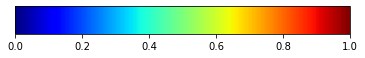

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
fig.savefig('colormap.png')
fig.show()

In [4]:
for f in os.listdir('Aug6/for_YS/'):
    try:
        mat=mat73.loadmat(os.path.join('Aug6/for_YS/',f))
    except:
        pass
    #print(f)
    if f=='fig4_sub2.mat':
        mat=mat73.loadmat(os.path.join('Aug6/for_YS/',f))
        print(f,mat.keys())
        Visual_3D(mat['vertices'],mat['faces'],np.array([250, 77, 9])/255,n='land_2',add_landmark=mat['landmarks'])


fig4_sub2.mat dict_keys(['faces', 'landmarks', 'values', 'vertices'])


/Users/yushi/opt/anaconda3/envs/Motion/lib/python3.9/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.7656364440917969, 0.884…

Plot saved to file land_2.html.


In [3]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
for f in os.listdir('Aug6/for_YS/'):
    mat=mat73.loadmat(os.path.join('Augfor_YS/',f))
    if 'coor' in mat.keys():
        f1=mat['faces']
        v1=mat['vertices']
        delindex=[]
        for i,v in enumerate(mat['vertices']):
            if v in mat['coor']:
                delindex.append(i)
        v1=np.delete(v1,delindex,0)
        c=np.delete(mat['values'],delindex,0)
        del_v=delindex
        delindex=[]
        print(f1.shape)
        mask=np.zeros(f1.shape)
        mi=mat['indices']
        for i in range(mi.shape[0]):
            mask=np.logical_or(mask,f1==mi[i])
        delindex=np.sum(mask,1)
        
        to_del=np.where(delindex>0)
        f1=np.delete(f1,to_del,0)
        rows,cols=f1.shape
        for i in range(rows):
            for j in range(cols):
                if f1[i][j]>del_v[0] and f1[i][j]<del_v[1]:
                    f1[i][j]-=1
                elif f1[i][j]>del_v[1]:
                    f1[i][j]-=2
        if re.match('fig5.*',f) is not None:  
            minv=-1.8
            maxv=2
        else:
            minv=min(c)
            maxv=max(c)
        print(f,minv,maxv)
        fig, ax = plt.subplots(figsize=(6, 1))
        fig.subplots_adjust(bottom=0.5)

        cmap = mpl.cm.jet
        norm = mpl.colors.Normalize(vmin=minv, vmax=maxv)

        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label(f)
        fig.show()
        name=os.path.splitext(f)[0]
        fig.savefig(name) 
        c=linear_mapping(c,minv,maxv)
        Visual_3D(v1,f1,c,f)
        
        

AssertionError: Augfor_YS/fig5_sub11.mat does not exist

/ll3/project/GIMRI_model/results/figures/for_YS/ddw_fig1_sub7.mat
dict_keys(['faces', 'values', 'vertices'])
ddw_fig1_sub7.mat 0.10984932827811271 0.6944754743803967
fail
ddw_fig1_sub7.mat 0.10984932827811271 0.6944754743803967


/tmp/ipykernel_3331082/2524829142.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.16473674774169922, -1.2…

Plot saved to file Nov23ddw_fig1_sub7.mat.html.
/ll3/project/GIMRI_model/results/figures/for_YS/ddw_fig1_sub8.mat
dict_keys(['faces', 'values', 'vertices'])
ddw_fig1_sub8.mat 0.10984932827811271 0.6944754743803967
fail
ddw_fig1_sub8.mat 0.10984932827811271 0.6944754743803967


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.7656364440917969, 0.884…

Plot saved to file Nov23ddw_fig1_sub8.mat.html.


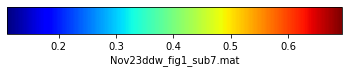

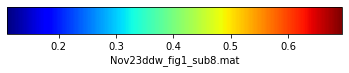

In [17]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
for f in os.listdir('/ll3/project/GIMRI_model/results/figures/for_YS/'):
    if re.match(f'ddw.*sub[7-8].*',f):
        name=os.path.join('/ll3/project/GIMRI_model/results/figures/for_YS/',f)
        print(name)
        mat=mat73.loadmat(name)
        print(mat.keys())
        f1=mat['faces']
        v1=mat['vertices']
        c=mat['values']
        # delindex=[]
        # for i,v in enumerate(mat['vertices']):
        #     if v in mat['coor']:
        #         delindex.append(i)
        # v1=np.delete(v1,delindex,0)
        # c=np.delete(mat['values'],delindex,0)
        # del_v=delindex
        # delindex=[]
        # print(f1.shape)
        # mask=np.zeros(f1.shape)
        # mi=mat['indices']
        # for i in range(mi.shape[0]):
        #     mask=np.logical_or(mask,f1==mi[i])
        # delindex=np.sum(mask,1)
        
        # to_del=np.where(delindex>0)
        # f1=np.delete(f1,to_del,0)
        # rows,cols=f1.shape
        # for i in range(rows):
        #     for j in range(cols):
        #         if f1[i][j]>del_v[0] and f1[i][j]<del_v[1]:
        #             f1[i][j]-=1
        #         elif f1[i][j]>del_v[1]:
        #             f1[i][j]-=2
        
        minv=min(c)
        maxv=max(c)
        print(f,minv,maxv)
        try:
            minv=mat['min']
            maxv=mat['max']
        except:
            print("fail")
            #c=linear_mapping(c,minv,maxv)
            c=np.array([0.85,0.325,0.098])
            
        #     Visual_3D(v1,f1,c,f)
        #     break
        # minv=-1.5
        # maxv=1.5
        fig, ax = plt.subplots(figsize=(6, 1))
        fig.subplots_adjust(bottom=0.5)

        cmap = mpl.cm.jet
        norm = mpl.colors.Normalize(vmin=minv, vmax=maxv)

        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label("Nov23"+f)
        fig.show()
        name=os.path.splitext(f)[0]
        fig.savefig(name) 
        print(f,minv,maxv)
        c=linear_mapping(mat['values'],minv,maxv)
        Visual_3D(v1,f1,c,"Nov23"+f)
        

In [69]:
name=os.path.join('/project/GIMRI_model/results/figures/for_YS/','fig5_sub4.mat')
mat=mat73.loadmat(name)
print(mat['indices'])

[4662. 4663.]


In [16]:
import re
for f in os.listdir('/ll3/project/GIMRI_model/results/figures/for_YS/'):
    """
    if re.match(f'fig10_sub3',f):
        
        mat=mat73.loadmat(os.path.join('/ll3/project/GIMRI_model/abstract/for_YS/',f))
        print(mat)
        #print(f,mat.keys())
        #c=np.array([250, 77, 9])/255
        c=np.repeat(np.array([[0.85,0.325,0.098]]),mat['values'].shape,axis=0)
        color=mat['values']
        for i,cc in enumerate(color):
            if cc!=1 :
                c[i,:]=np.array([0,0.447,0.7410])
        
        print(c)
        name=os.path.splitext(f)[0]
        m=[20,15,10]
        ma=[-20,-15,-10]
        v=mat['vertices']
        m=[np.max(v[:,0]),np.max(v[:,1]),np.max(v[:,2])]
        ma=[np.min(v[:,0]),np.min(v[:,1]),np.min(v[:,2])]
        #print(m,ma)
        coor={}
        coor['m']=[20,20,15]
        coor['ma']=[-20,-20,-15]
        Visual_3D(mat['vertices'],mat['faces'],c,n='Oct10'+name,v_box_coods=coor)
        """
    
    if re.match('ddw.*sub[1-6].*',f):
        mat=mat73.loadmat(os.path.join('/ll3/project/GIMRI_model/results/figures/for_YS/',f))
        #print(f,mat.keys())
        #c=np.array([250, 77, 9])/255
        c=np.array([0.85,0.325,0.098])
        name=os.path.splitext(f)[0]
        m=[20,15,10]
        ma=[-20,-15,-10]
        v=mat['vertices']
        m=[np.max(v[:,0]),np.max(v[:,1]),np.max(v[:,2])]
        ma=[np.min(v[:,0]),np.min(v[:,1]),np.min(v[:,2])]
        #print(m,ma)
        coor={}
        coor['m']=[20,20,15]
        coor['ma']=[-20,-20,-15]
        Visual_3D(mat['vertices'],mat['faces'],c,n='Nov23'+name,v_box_coods=coor)
    
    """
    num=[a for a in range(35,45)]
    for i in num:
        if re.match(f'fig5.*{i}.*',f):
            mat=mat73.loadmat(os.path.join('Aug6/for_YS/',f))
            #print(f,mat.keys())
            c=linear_mapping(mat['values'],0,1)
            name=os.path.splitext(f)[0]
            Visual_3D(mat['vertices'],mat['faces'],c,n='Aug6'+name)
    """   
    #if f=='fig4_sub2.mat':
    #    mat=mat73.loadmat(os.path.join('Aug6/for_YS/',f))
    #    print(f,mat.keys())
    #    Visual_3D(mat['vertices'],mat['faces'],np.array([250, 77, 9])/255,n='land_2',add_landmark=mat['landmarks'])

Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(-6.832683563232422, -3.97…

Plot saved to file Nov23ddw_fig1_sub1.html.


/tmp/ipykernel_3331082/2177081679.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [7, 4], [0, 4], [1, 5], [2, 6], [7, 3]], dtype=np.int)


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(-10.191215515136719, -3.2…

Plot saved to file Nov23ddw_fig1_sub2.html.


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.004814624786376953, 0.3…

Plot saved to file Nov23ddw_fig1_sub3.html.


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.07393312454223633, 0.31…

Plot saved to file Nov23ddw_fig1_sub4.html.


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.08640861511230469, 0.22…

Plot saved to file Nov23ddw_fig1_sub5.html.


Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(0.12029123306274414, 0.64…

Plot saved to file Nov23ddw_fig1_sub6.html.


In [ ]:
import re
for f in os.listdir('/project/GIMRI_model/results/figures/for_YS/'):
    
    num=[a for a in range(1,51)]
    for i in num:
        if re.match(f'fig7.*{i}.*',f):
            mat=mat73.loadmat(os.path.join('/project/GIMRI_model/results/figures/for_YS/',f))
            #print(f,mat.keys())
            c=np.array([250, 77, 9])/255
            name=os.path.splitext(f)[0]
            m=[15,17,12]
            ma=[-15,-17,-12]
            v=mat['vertices']
            m=[np.max(v[:,0]),np.max(v[:,1]),np.max(v[:,2])]
            ma=[np.min(v[:,0]),np.min(v[:,1]),np.min(v[:,2])]
            #print(m,ma)
            coor={}
            coor['m']=[18,18,12]
            coor['ma']=[-18,-18,-12]
            Visual_3D(mat['vertices'],mat['faces'],c,n='Aug19'+name,v_box_coods=coor)

In [41]:
mat=mat73.loadmat('/project/GIMRI_model/results/figures/for_YS/fig6_sub6.mat')

p=mp.plot(mat['vertices'],shading={"point_size": 1.1})
m=[15,17,12]
ma=[-15,-17,-12]

v_box = np.array([[m[0], m[1], m[2]], [ma[0], m[1], m[2]], [ma[0], ma[1], m[2]], [m[0], ma[1], m[2]],
                  [m[0], m[1], ma[2]], [ma[0], m[1], ma[2]], [ma[0], ma[1], ma[2]], [m[0], ma[1], ma[2]]])

# Edges of the bounding box
f_box = np.array([[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], 
                  [7, 4], [0, 4], [1, 5], [2, 6], [7, 3]], dtype=np.int)



p.add_points(v_box, shading={"point_color": "white"})
p.save('point.html')

Renderer(camera=PerspectiveCamera(children=(HemisphereLight(intensity=0.8, position=(1.5123066902160645, 0.802…

Plot saved to file point.html.


/tmp/ipykernel_237367/2100214028.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [7, 4], [0, 4], [1, 5], [2, 6], [7, 3]], dtype=np.int)


In [7]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains,ActionBuilder
from time import sleep
import os



chrome_option=webdriver.ChromeOptions()
#chrome_option.add_argument('--headless')
driver=webdriver.Chrome(executable_path='/ll3/home/yushi/Desktop/Research/visulizzation/chromedriver',chrome_options=chrome_option)
path=os.getcwd()
X=800
Y=800
driver.set_window_size(X,Y)
path=os.getcwd()
#print(os.path.join(path,'slices1.html'))
for f in os.listdir('.'):
    """
    if re.match('Aug19fig7.*.html',f) or re.match('point.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(3)
        print("file://"+os.path.join(path,f))
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(255,0).perform()
        sleep(1)
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        
        #driver.quit()
        print("end...")
    
    if re.match('Aug19fig7.*.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(3)
        print("file://"+os.path.join(path,f))
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(250,0).perform()
        sleep(1)
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        
        #driver.quit()
        print("end...")
    
    """
    
    if re.match('Nov4.*.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(5)
        print("file://"+os.path.join(path,f))
        
        
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(-40,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        ActionChains(driver).click_and_hold().move_by_offset(300,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'back.png')
        ActionChains(driver).click_and_hold().move_by_offset(-300,0).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,295).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'up.png')
        ActionChains(driver).click_and_hold().move_by_offset(0,-295).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'bottom.png')
        #driver.quit()
        print("end...")
    """
    
    if re.match('Aug.*3[5-9].*.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(5)
        print("file://"+os.path.join(path,f))
        
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(300,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'back.png')
        ActionChains(driver).click_and_hold().move_by_offset(-300,0).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'up.png')
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'bottom.png')
        driver.quit()
        print("end...")
    """


/tmp/ipykernel_783126/884629253.py:10: DeprecationWarning: use options instead of chrome_options
  driver=webdriver.Chrome(executable_path='/ll3/home/yushi/Desktop/Research/visulizzation/chromedriver',chrome_options=chrome_option)


file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig1_awake_before_sub5.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_108_1_d15.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_106_1_avg.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_106_1_d17.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_105_2_d15.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_106_1_d18.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_105_2_d16.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig1_awake_after_sub1.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig1_anes_after_sub1.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig1_anes_before_sub5.html
end...
file:///ll3/home/yushi/Desktop/Research/visulizzation/Nov4fig2_P1_108_1_avg.html
end...
file:///ll3/home

In [19]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains,ActionBuilder
from time import sleep
import os



chrome_option=webdriver.ChromeOptions()
#chrome_option.add_argument('--headless')
driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)
path=os.getcwd()
X=800
Y=800
driver.set_window_size(X,Y)
path=os.getcwd()
#print(os.path.join(path,'slices1.html'))
for f in os.listdir('.'):
    
    if re.match('Aug.*4[0-4].*.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(5)
        print("file://"+os.path.join(path,f))
        
        
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(-40,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        ActionChains(driver).click_and_hold().move_by_offset(300,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'back.png')
        ActionChains(driver).click_and_hold().move_by_offset(-300,0).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,295).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'up.png')
        ActionChains(driver).click_and_hold().move_by_offset(0,-295).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'bottom.png')
        #driver.quit()
        print("end...")
        
    
    

/tmp/ipykernel_9598/3943592569.py:10: DeprecationWarning: use options instead of chrome_options
  driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)


WebDriverException: Message: 'chromedriver_3' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [15]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains,ActionBuilder
from time import sleep
import os



chrome_option=webdriver.ChromeOptions()
#chrome_option.add_argument('--headless')
driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)
path=os.getcwd()
X=800
Y=800
driver.set_window_size(X,Y)
path=os.getcwd()
#print(os.path.join(path,'slices1.html'))
for f in os.listdir('.'):
    
    if re.match('Aug.*3[5-9].*.html',f):
        driver.get("file://"+os.path.join(path,f))
        sleep(5)
        print("file://"+os.path.join(path,f))
        
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'front.png')
        action = ActionBuilder(driver)
        action.pointer_action.move_to_location(300, 300)
        action.perform()
        ActionChains(driver).click_and_hold().move_by_offset(300,0).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'back.png')
        ActionChains(driver).click_and_hold().move_by_offset(-300,0).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'up.png')
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        ActionChains(driver).click_and_hold().move_by_offset(0,-290).perform()
        driver.get_screenshot_as_file(os.path.splitext(f)[0]+'bottom.png')
        #driver.quit()
        print("end...")
    

/var/folders/_s/nv_19n4s5rs_f8_vl4m97kj80000gn/T/ipykernel_81721/4200339984.py:10: DeprecationWarning: use options instead of chrome_options
  driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)


file:///Users/yushi/Desktop/Course Related/Bio/Visulization/Aug6fig5_sub37.html
end...
file:///Users/yushi/Desktop/Course Related/Bio/Visulization/Aug6fig5_sub36.html
end...
file:///Users/yushi/Desktop/Course Related/Bio/Visulization/Aug6fig5_sub39.html
end...
file:///Users/yushi/Desktop/Course Related/Bio/Visulization/Aug6fig5_sub35.html
end...
file:///Users/yushi/Desktop/Course Related/Bio/Visulization/Aug6fig5_sub38.html
end...


In [13]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
import os

chrome_option=webdriver.ChromeOptions()
#chrome_option.add_argument('--headless')
driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)
path=os.getcwd()
X=800
Y=800
driver.set_window_size(X,Y)
print(os.path.join(path,'slices1.html'))
driver.get("file://"+os.path.join(path,'slices1.html'))
sleep(3)
ActionChains(driver).move_by_offset(X//2,Y//2).click_and_hold().move_by_offset(150,0).perform()
sleep(3)
driver.get_screenshot_as_file("screenshot.png")
driver.quit()
print("end...")

/var/folders/_s/nv_19n4s5rs_f8_vl4m97kj80000gn/T/ipykernel_67256/4176641287.py:8: DeprecationWarning: use options instead of chrome_options
  driver=webdriver.Chrome(executable_path='/Users/yushi/Downloads/chromedriver_3',chrome_options=chrome_option)


/Users/yushi/Desktop/Course Related/Bio/Visulization/slices1.html
end...
